Q - so KNN models do not handle input data that is binary very well? I thought I remembered reading that they work best when input data is continuous?

In [22]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

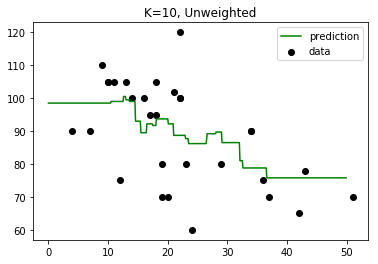

In [23]:
from sklearn import neighbors

#building the model
knn = neighbors.KNeighborsRegressor(n_neighbors = 10) #higher k == a flatter line, neighbors only pull up/down right?
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X,Y)

#setting up prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis] #what is this?

#Trailing underscores are a common convention for a prediction
Y_ = knn.predict(T)

plt.scatter(X, Y, c= 'k', label = 'data')
plt.plot(T, Y_, c='g', label = 'prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

Q - So since the prediction isn't selecting a category but rather a value and we are using k=10 above, that green line is basically saying at this point on the x axis if we had to choose the 10 closest points, our prediction would be y. It then moves 0.1 ticks up and repeats?

In [55]:
#Running the same model as above but this time with weighting involved
knn_w = neighbors.KNeighborsRegressor(n_neighbors = 4, weights = 'uniform')
X = pd.DataFrame(music[['loudness','duration']])
Y = music.bpm
knn_w.fit(X, Y)

#prediction line -- can we even do a prediction line since it's 3D at this point?
T1 = np.arange(0, 50, 0.1)#[:, np.newaxis] understand it's creating x inputs from 0-50 with .1 intervals I think
T2 = np.arange(100, 450, 0.7)
T2 = T2[:500]
TT = pd.DataFrame({'loudness' : list(T1), 'duration' : list(T2)})
Y_ = knn_w.predict(TT)


#plt.scatter(X, Y, c='k', label = 'data')
#plt.plot(T, Y_, c='g', label = 'prediction')
#plt.legend()
#plt.title('K=10, Weighted')
#plt.show()

In [56]:
knn_w.predict([45,370])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 93.75])

In [57]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv = 5) #this is creating 5 folds?
print('Unweighted Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2)) 
#clearly this % operator above is different than .format but what exactly is it doing?
score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy %0.2f (+/- %0.2f)' % (score_w.mean(), score_w.std() *2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy -0.84 (+/- 1.25)


The weighted accuracy has gone up exponentially after I did two things: Lower the K and change weight from distance to uniform. I suspect a lot of this is because it is an extremely limited sample size